In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

# Introdução ao aprendizado profundo, redes neurais convolucionais e Keras
Fontes : 

1) https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

2) https://towardsdatascience.com/a-visual-introduction-to-neural-networks-68586b0b733b

3) http://www.dspguide.com/graphics/F_26_5.gif

4) https://cdn-images-1.medium.com/max/1600/1*iT3SEgwnbhLloLY_zk1PfA.gif

5) https://cdn-images-1.medium.com/max/1600/0*Eyhhx33AK58cHDXZ.png

6) http://colah.github.io/posts/2014-07-Understanding-Convolutions/

7) https://docs.gimp.org/2.10/en/gimp-filter-convolution-matrix.html

## Por que profundo? 

### Multilayered Perceptron

![Multilayer perceptron](http://www.dspguide.com/graphics/F_26_5.gif)

Esta arquitetura aparentemente aprende sem nenhum problema... então por que complicar?

![learning model](https://cdn-images-1.medium.com/max/1600/1*iT3SEgwnbhLloLY_zk1PfA.gif)

### Deeper Network

![Deeper Network](https://cdn-images-1.medium.com/max/1600/0*Eyhhx33AK58cHDXZ.png)

Nem todos os espaços de features são simples como o mostrado acima - às vezes ajuda você ter diversas camadas de interpretação dos dados.

Exemplo legal para entender melhor: http://scs.ryerson.ca/~aharley/vis/conv/flat.html

### O que é convolução?

 Explicação bem visual e detalhada pode ser encontrada aqui: http://colah.github.io/posts/2014-07-Understanding-Convolutions/


Para o nosso caso, tenham isso em mente: 

![definição básica de convolução](http://colah.github.io/posts/2014-07-Understanding-Convolutions/img/RiverTrain-ImageConvDiagram.png)

Aplica-se o kernel de convolução a cada um dos quadrados disponíveis na imagem, obtendo-se a imagem ao lado:

A | B | C
- | - | - |
![original](https://docs.gimp.org/2.10/en/images/filters/examples/generic-taj-convmatrix-sharpen.jpg) | ![kernel](https://docs.gimp.org/2.10/en/images/filters/examples/convolution-edge-detect1.png) |![result](https://docs.gimp.org/2.10/en/images/filters/examples/generic-taj-convmatrix-edge-detect.jpg) 

#### Exemplo notável de convolução de kernels feitos a mão -algoritmo de Viola-Jones para detecção de faces : https://cs.nyu.edu/courses/fall12/CSCI-GA.2560-001/FaceRecognitionBoosting.pdf

### Por quê convoluir?
Mais fácil de entender com um exemplo

# Conhecendo nosso dataset - O que é MNIST?

Using TensorFlow backend.


11493376/11490434 [==============================] - 41s 4us/step


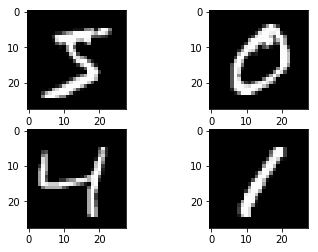

In [2]:
%matplotlib inline
# O keras tem o dataset já pre-carregado
from keras.datasets import mnist
import matplotlib.pyplot as plt
# carregamos o dataset:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

Imagens em grayscale 28x28 de dígitos escritos a mão - O objetivo é identificar cada um deles. 

# O que é o Tensorflow  ?  O que é o Keras ? 

## Tensorflow é bem mais versátil, mas bem mais verboso - vide https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/neural_network_raw.ipynb

# Baseline model - Multilayer perceptron

Para efeitos de comparação, vamos construir uma rede neural rasa plenamente conectada, para se ter uma idéia de tamanho e de performance. 

In [4]:
#importamos as bibliotecas relevantes
import numpy as np
# o dataset do mnist
from keras.datasets import mnist
# O Keras permite que nós construamos modelos de diversos tipos, LSTM, paralelos entre outros. Para o nosso caso, basta
# o modelo sequencial feedforward i.e. a saida de uma camada serve de entrada para a outra e uma camada só vê o que sai
# da que veio antes dela, daí, Sequential.
from keras.models import Sequential
# cada "pedaço" de uma rede neural é tratado no keras como sendo uma camada. A camada dense é uma camada fully connected
# de uma rede neural.
from keras.layers import Dense
# dropout é uma técnica usada para garantir que a rede neural fique mais robusta a variações e que ela tenha redundâncias
# na detecção. - Leia mais sobre isso aqui : https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5
from keras.layers import Dropout
# Esta biblioteca ajuda a fazer o one-hot encoding dos alvos. 
from keras.utils import np_utils

In [ ]:
# Mantendo uma seed constante no gerador aletório do numpy
seed = 7
np.random.seed(seed)

In [ ]:
# carrego os dados
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# transformando as imagens 28x28 em um vetor com 784 componentes para poder servir de entrada para a primeira camada da rede
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [ ]:
# Normalizando os inputs - prática comum em NN - deixa o problema melhor comportado numericamente
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# one-hot encoding dos outputs (maneira usada para se lidar comproblemas de classificação múltipla em redes neurais)
# one-hot encoding é também usado para se lidar com variáveis categóricas como features!
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

![Multilayer perceptron](http://www.dspguide.com/graphics/F_26_5.gif)

In [ ]:
# definindo o modelo baseline
def baseline_model():
    # criamos o modelo
    # começamos por instanciar o esqueleto do modelo, neste caso, o sequencial
    model = Sequential()
    # em seguida, adicionamos as camadas uma a uma. Adicionamos uma camada de entrada com ativação relu
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    # e a camada de saída, com ativação softmax para transformar as saídas numéricas em probabilidades
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # compilamos o modelo escolhendo a função objetiva, o otimizador (cuja escolha é empírica) e a métrica 
    #de performance mais conveniente.
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
%matplotlib inline
# construimos o modelo com nossa classe
model = baseline_model()
model.summary()

Note que, para um modelo extremamente simples, nos já temos mais de 600k parâmetros para ajustar. 

In [ ]:
# Treinamos o modelo, usando uma sintaxe parecida com a do scikit-learn, selecionando dois fatores cruciais para o 
# treinamento de redes neurais - o tamanho do batch e o número de rounds no treinamento.
# O número de rounds no treinamento é simples - indica quantas vezes você vai aplicar o algoritmo de Backpropagation 
# no seu dataset de treino. Se você tem um modelo com muita variância e treina ele demais - acaba overfitando.
# O outro parâmetro relevante é o tamanho do batch. O batch é a quantidade de samples que vc usa por cada step do algoritmo
# de backpropagation que você faz. Um batch size pequeno garante que você fará muitos updates dos parâmetros do seu modelo
# mesmo durante a primeira rodada, o que pode acelerar o aprendizado. Ao mesmo tempo, um batch size pequeno pode acabar
# te prendendo em um máximo/mínimo local. Portanto, é interessante brincar com esse parâmetro e ver o que acontece com 
# a acurácia do seu modelo e com seu tempo de convergência.
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Avaliação final do modelo.
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

# Boa estratégia ?

# Rede Convolucional Simples


In [4]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [5]:
# Mantendo a seed constante para poder reproduzir os resultados
seed = 7
np.random.seed(seed)

In [6]:
# carregamos o dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# imagens podem ter várias camadas de cor - R,G,B, por exemplo. Assim sendo, modelos convolucionais geralmente esperam
# em suas entradas, matrizes tetradimensionais, i.e., no formato [samples][canais][width][height] , onde canais é o número
# de canais de cor de sua imagem. No caso do MNIST, é uma imagem em grayscale, então temos apenas um canal de cor. 
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [7]:
# Novamente normalizando as features
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
def baseline_model():
    # criando o modelo
    model = Sequential()
    # de novo, simplesmente basta adicionar a camada de convolução. Vale notar que para esta camada temos que determinar
    #o número de kernels de convolução, (32,neste caso), o tamanho do kernel de convolução (5x5) e o formato de cada 
    # entrada, neste caso, 1 canal e uma imagem 28x28
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    # em seguida, adicionamos uma camada de pooling, para reduzir a dimensionalidade do problema e acelearar o aprendizado
    # sobre o efeito do pooling, vc pode ler mais aqui: https://pt.coursera.org/lecture/convolutional-neural-networks/pooling-layers-hELHk
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # incluimos uma camada de dropout para adicionar robustez ao aprendizado
    model.add(Dropout(0.2))
    # em seguida, para a camada de saída, temos que formatar as saídas da camada convolucional em um vetor que pode servir
    # de entrada para uma camada conectada tradicional
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    # adicionamos, por fim, a camada de saída, com ativação softmax para transformar os valores em probabilidades.
    model.add(Dense(num_classes, activation='softmax'))
    # compilando o modelo
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
# build the model
model = baseline_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 24, 24)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 12, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________


Observe que esta rede, apesar de ter mais camadas e ser evidentemente mais complexa em termos de arquitetura, tem menos componentes.

In [ ]:
# Fitando o modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=1)
# Avaliação final do modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

## Esta avaliação de erro faz sentido? Usamos a melhor versão do nosso modelo? 
### Não! Contaminamos a análise usando os dados de teste como validação. 
### Talvez! 10 não é um número mágico! Talvez treinar mais resultasse em uma acurácia maior! 

## Para consertar isso, dividimos o set de treino em dois pedaços, um de treino e outro de validação:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_real_train,X_validation,Y_real_train,Y_validation = train_test_split(X_train,y_train, test_size = 0.2)

In [ ]:
# estabelecemos então uma função de callback do keras chamada early stopping
from keras.callbacks import EarlyStopping

Com o early stopping, o modelo para de ser treinado a partir do momento que o erro de validação para de cair. Neste contexto, o parâmetro patience indica quantas etapas de treinamento consecutivas o erro de valicação deve ser não decrescente até que o modelo pare de treinar. Isso é importante para evitar que algum efeito de ruído aumente seu erro de validação em uma época de treinamento e você pare de treinar o seu modelo mais cedo do que o necessário por causa disso.

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2)]

In [ ]:
# Alteramos então a chamada do método fit:

In [ ]:
model.fit(X_real_train, Y_real_train, validation_data=(X_validation,Y_validation), epochs=20, 
          batch_size=200, verbose=1, callbacks = callbacks)


In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Note que - com o early stopping, treinamos por menos etapas, mas obtivemos um modelo com performance melhor.

# Deep convolutional Neural Network

Vamos agora fazer uma rede com duas camadas convolucionais! 

In [ ]:
# CNN maior
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
K.set_image_dim_ordering('th')
# fixando a random seed:
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalizando os inputs 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# separando o treinamento entre treino e validação: 
X_real_train,X_validation,Y_real_train,Y_validation = train_test_split(X_train,y_train, test_size = 0.2)

In [ ]:
# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# build the model
model = larger_model()
model.summary()

Note a diferença brutal entre a quantidade de parâmetros da primeira rede que treinamos e essa. Uma redução de 10 vezes! Vamos ver se essa redução de parâmetros tém impacto negativo na perforamnce.

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2)]
# Fit the model
model.fit(X_real_train, Y_real_train, validation_data=(X_validation,Y_validation), epochs=20, 
          batch_size=200, verbose=1, callbacks = callbacks)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

O modelo Melhorou ainda mais! 
Espero que este tutorial ajude na compreensão do uso da biblioteca do Keras para construção de redes neurais simples. Para mais informações, o site do próprio keras tem explicações e tutoriais bem detalhados sobre mais casos de uso! 
https://keras.io/

# Divirtam-se! 